### NlTk lnaugrural

In [5]:
import nltk
from nltk.download()
#메뉴가 뜬다. 구구단에 활용하면 좋을거같다. 

# 질문 왜 실행이 안돼지 ㅠㅠㅠ

SyntaxError: invalid syntax (Temp/ipykernel_11916/2170098014.py, line 2)

In [6]:
import nltk
nltk.download(['brown','inaugural']) # 메뉴가 뜬다. 구구단에 활용하면 좋을거같다. 

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [14]:
brown = nltk.corpus.brown

In [20]:
brown.fileids()[:10]
# 파일 열어보기

['ca01',
 'ca02',
 'ca03',
 'ca04',
 'ca05',
 'ca06',
 'ca07',
 'ca08',
 'ca09',
 'ca10']

In [24]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [29]:
brown.words()

NameError: name 'humor' is not defined

In [22]:
cfd = nltk.ConditionalFreqDist(
    (genre,word)
    for genre in brown.categories()
    for word in brown.words(categories=genre) #이 부분이 왜 있는지 모르겠다.
)

modals = ['can','could','would']

cfd.tabulate(conditions=brown.categories(),samples=modals)


# tabulate() : 표만들기

                  can could would 
      adventure    46   151   191 
 belles_lettres   246   213   392 
      editorial   121    56   180 
        fiction    37   166   287 
     government   117    38   120 
        hobbies   268    58    78 
          humor    16    30    56 
        learned   365   159   319 
           lore   170   141   186 
        mystery    42   141   186 
           news    93    86   244 
       religion    82    59    68 
        reviews    45    40    47 
        romance    74   193   244 
science_fiction    16    49    79 


In [31]:
# modals의 빈도수가 포함된 cfd(word > modal_verb)

cfd1 = nltk.ConditionalFreqDist(
    (genre,modal)
    for genre in brown.categories()
    for modal in ['can','could','would','will','might','may']
    
    for word in brown.words(categories=genre)
    if word.lower() == modal #이게 왜 있는지
)
cfd1.tabulate() 
# 타블렛은 표를 만드는 것

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


In [ ]:
# 타블렛 오류나면
# !pip install matplotlib
import matplot.pyplot as plt
plt.figure(figsize=(12,5))
cfd1.plot()

### inaugural

In [ ]:
연설문 코퍼스

In [32]:
inaugural = nltk.corpus.inaugural

In [34]:
inaugural.fileids()[:10] #연도-이름,txt 형태로 되어있음 

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt']

In [39]:
# cfd ['america', 'citizen'] 빈도수를 cfd로 만드시오

cfd2 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4]) #txt를 지우고 출력하기 위해서
    for fileid in inaugural.fileids()
    for target_word in ['citizen','america']
    
    for word in inaugural.words(fileids=fileid)
     if word.lower() == target_word # 타겟워드는 씨티즌
    # if target_word in word.lower()
    # if word.lower() == modal
)

cfd2.tabulate() 

        1793-Washington      1797-Adams     1817-Monroe     1821-Monroe      1825-Adams   1837-VanBuren   1841-Harrison     1853-Pierce   1857-Buchanan    1861-Lincoln      1869-Grant      1873-Grant      1877-Hayes   1881-Garfield  1885-Cleveland   1889-Harrison  1893-Cleveland       1909-Taft     1917-Wilson    1921-Harding   1925-Coolidge     1929-Hoover  1937-Roosevelt  1941-Roosevelt  1945-Roosevelt 1953-Eisenhower 1957-Eisenhower    1961-Kennedy    1965-Johnson      1969-Nixon      1973-Nixon     1977-Carter     1981-Reagan     1985-Reagan       1989-Bush    1993-Clinton    1997-Clinton       2001-Bush       2005-Bush      2009-Obama      2013-Obama      2017-Trump      2021-Biden 
america               1               5               0               2               0               1               0               0               1               0               0               0               0               1               0               0               0               4        

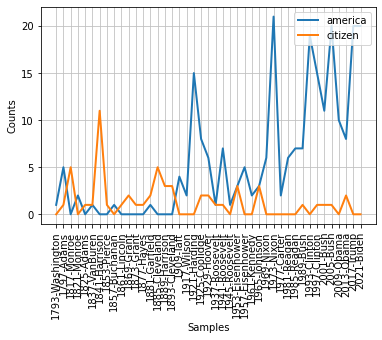

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
cfd2.plot() # 이미지로

In [ ]:
# 컨디션은 상황에 맞는 빈도수를 구하는 것
# 특정한 단어의 쓰임이라든다. 

# 그 전 수업에서 몰랐던것들
f = FreqDist(text)
f.most_common(숫자) : 빈도수가 숫자보다 높은것들을 가장 빈번한 순으로 저장
f['단어'] : 횟수를 반환
f.freq('단어'): 퍼센트로 반환
f.plot(): 그래프로 나타냄

코퍼스 의미 : 말뭉치, 자연언어 연구를 위해 특정한 목적을 가지고 언어의 표본을 추출한 집합


In [49]:
b = nltk.corpus.brown
b.fileids()
b.categories()

[]

### 튜플 Tuple & list

In [ ]:
- 튜플() vs List[]
- 불변객체 vs 가변객체

In [ ]:
# 생성
튜플 # 두 방법 모두 사용가능 
emptyT = ()
emptyT = tuple()

리스트 
emptyL = []
emptyL = list()


In [ ]:
# 1.1 요소가 여러개일때

In [51]:
aT = ('a','b')
aT =  'a','b' # 튜플은 괄호 없어가 없어도 튜플로 인식 가능

aL = ['a','b'] # 리스트는 필요함

type(aT)

tuple

In [52]:
aT = 'a','b'
type(aT)

tuple

In [ ]:
# 요소가 1개일때

a = ('a') #문자열
aT = ('a',) # 괄호하고, 뒤에 쉼표를 해줘야 튜플로 인식

In [55]:
# 할당할때 여러개를 할 수 있다.
a,b,c = 'ikm' # umpacking : 한 변수에 여러 데이터가 들어있을때, 여러 변수에 나누는 것

 a = 'i' b ='k' c ='m'

print(a,b,c)

i k m


In [ ]:
 # packing : 한 변수에 여러 데이터를 할당하는 것
 - list, tuple 자체, a = [1,2,3,4]

In [59]:
# 튜플이 좋은 점, 값을 교환하기 가능
pwd = 'abcd'
userId = 'sky'

pwd = userId #서로 바꿀려면
print(pwd,userId) # userId는 바뀌지 않는다.

sky sky


In [ ]:
# 상호교환 하려면
temp1 = userId
temp2 =pwd
pwd = temp1
userid = temp2 
# 이 과정을 거쳐야 하늗데

In [63]:
pwd = 'abcd'
userId = 'sky'

pwd, userId = userId,pwd #간단하게 가능

print(pwd,userId) 

sky abcd


In [64]:
# 연산
('a') + (1,2)
(1,2) * 3

TypeError: can only concatenate str (not "tuple") to str

In [ ]:
x = ('a',)
y =(1,2)
id(x), id(x+y) #둘의 아이디가 다르다. 새로 할당한것

In [ ]:
# 비교 가능 

In [ ]:
# 순회 
for i in x:
    print(x)

In [ ]:
[i for i in x] # 컴프리헨션 가능

In [ ]:
# 튜플 컴프리헨션은 없다.
# 리스트 컴프리헨션만 있다.
다만 바꿀수셔ㅔ는 있다. 
tuple([i for i in x])

*[i for i in x], # 느리다. 

#필요한 경우아니면 튜플로 바꾸지 않는다.

In [ ]:
# 형변환
dog = 'dog'
tuple(dog) #각 하나씩 넣는다.
(dog) #전체를 튜플로 넣는다.

tuple()

In [ ]:
# 슬라이싱 가능 slicing
dogT[0]

In [ ]:
정리
- tuple 장점
 - 변하지 않는 데이터, 시퀀스를 연동할수 있다. (다른 사람이 변경하는 것을 막을수있다. 타인의 접근 막음)
    - 메모리 사용이 적다
    # 중복 가능
    
- 리스트의 장점
 - 튜플 장점 필요없다면 전부 리스트 사용
 - 데이터를 순차적으로 파악할 때 
 - 중복데이터를 쓸수있다는 점(set이랑 비교)

In [ ]:
### 리스트의 유용한 함수들
- 변경, 삭제, 추가,
- 리스트 컴프리헨션을 업그레이드

In [14]:
list('abcd')

['a', 'b', 'c', 'd']

In [32]:
num = list(range(5))
num

[0, 1, 2, 3, 4]

In [33]:
# 추가
num.append([6]) # 맨뒤에 요소 추가 / 여러개르 추가 불가능, 하나씩
num

[0, 1, 2, 3, 4, [6]]

In [34]:
# insert(index, item)
num.insert(0,8)
num

[8, 0, 1, 2, 3, 4, [6]]

In [35]:
# 여러개 추가
num.extend([6,6]) #확장: 리스트를 리스트로 할당
num
# extend 랑 append랑 추가되는 모양이 다르다. append는 리스트 기호까지 포함된다.
# 리스트 기호가 있더라도 포함되지 않는다.

[8, 0, 1, 2, 3, 4, [6], 6, 6]

In [36]:
a = ['love','star']
num.extend(a) # 리스트 이름만 넣어도 가능
num

[8, 0, 1, 2, 3, 4, [6], 6, 6, 'love', 'star']

In [37]:
b = ['mountain']
num.insert(10,b)
num

[8, 0, 1, 2, 3, 4, [6], 6, 6, 'love', ['mountain'], 'star']

In [38]:
k = [5,5]
num.insert(0,k)
num
# insert도 하나의 요소를 바로 넣으면 리스트 기호가 포함되지 않지만, 변수를 할당하고 여러 값을 넣으면 리스트 기호 생김

[[5, 5], 8, 0, 1, 2, 3, 4, [6], 6, 6, 'love', ['mountain'], 'star']

In [39]:
c = ['best','friend']
num.append(c)
num

[[5, 5],
 8,
 0,
 1,
 2,
 3,
 4,
 [6],
 6,
 6,
 'love',
 ['mountain'],
 'star',
 ['best', 'friend']]

In [ ]:
num += x #랑 비슷하다.= extend

In [54]:
classnum = [2,0,2,1,0,2,8,5,8]

In [55]:
# offset
classnum[0]=9
classnum

[9, 0, 2, 1, 0, 2, 8, 5, 8]

In [56]:
# slice
classnum[:3] = 2,2,2
classnum

[2, 2, 2, 1, 0, 2, 8, 5, 8]

In [58]:
# 주의
classnum[:3] = 'bob' #하면 언팩킹해서 글자가 분리되어서 바뀜
classnum

['b', 'o', 'b', 2, 8, 5, 8]

In [52]:
# 언팩킹하지 않고 넣을려면 이렇게
classnum[:3] = ['bob'] 
classnum

['bob', 8, 5, 8]

In [60]:
#삭제
del classnum[:3]
classnum

[8]

In [72]:
num2 = [1,2,3,4,5,6]

In [73]:
#삭제 : remove(value)
num2.remove(2) # 인덱스 아니고, 삭제하고 싶은 값을 지워라
num2

[1, 3, 4, 5, 6]

In [74]:
# pop (index) 기본값 = -1
num2.pop()
num2

[1, 3, 4, 5]

In [75]:
num2.pop(1)
num2

[1, 4, 5]

In [79]:
# 인덱스 찾기 / 위치 찾기 
num2.index(1)

0

In [71]:
# clear 다지우기
num2.clear()
num2

[]

In [ ]:
# 인덱스 찾기
num.index(4)

In [80]:
0 in num2 #요소가 있는지 확인

False

In [83]:
num2.append(5)
num2

[1, 4, 5, 5, 5]

In [84]:
# 정렬 = 
# num.sort()
# sorted(변수)

[5, 5, 5, 4, 1]

In [91]:
sorted(num2, reverse = True) #변한 값만 복사해서 출력

[5, 5, 5, 4, 1]

In [92]:
sorted(num2)

[1, 4, 5, 5, 5]

In [93]:
num2.sort(reverse = True) # 리스트.sort(), 값을 할당하지 않아도 된다.
num2

[5, 5, 5, 4, 1]

In [98]:
# reverse(), reversed() 차이없다. 값 반환하고 안하는 차이
num2.reverse()
num2

[5, 5, 5, 4, 1]

In [99]:
reversed(num2)

In [117]:
# 할당 
a = list(range(1,5))
a

[1, 2, 3, 4]

In [118]:
b = a #복사 # 이꼴사인하면 메모리 주소를 참조하는 것
b[0] = 6
a
 # 둘 다 값이 바뀐다.

[6, 2, 3, 4]

In [119]:
id(a),id(b) # 메모리주소 확인

(2951459813184, 2951459813184)

In [124]:
# shallow copy:참조하지 않고 새로운 개체에 할당하는 방법, 얕은 복사
c = a.copy() #id 같음
d = list(a)
e = a[:]

id(a), id(c), id(d), id(e) #다 메모리 주소가 다 다르다

(2951459813184, 2951460696960, 2951460696576, 2951458873472)

In [125]:
# deepcopy #깊은 복사, 하위에 중첩된 리스트요소가 안바뀌도록
a.append([1,2,3])
a

[6, 2, 3, 4, [1, 2, 3]]

In [126]:
f = a.copy()
id(a), id(f)

(2951459813184, 2951459769920)

In [127]:
f[-1][0] = 9 
a,f

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [9, 2, 3]])

In [131]:
print(a[-1][1])

2


In [133]:
import copy
g = copy.deepcopy(a)

In [136]:
g
id(g), id(a)

(2951460747136, 2951459813184)

In [137]:
g[-1][0] = 10

#리스트가 어떻게 바뀌는지 파악할 것
# a의 요소는 바뀌지 않고, g의 요소만 바뀐다. 

In [138]:
a,g

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [10, 2, 3]])

In [139]:
# 순회 : zip, enumerate
name = ['kate','reyce','phill']
age =[77,44,54]

# (name,age)
for item1,item2 in zip(name,age):
    print((item1,item2)) #중첩문과 좀 다르다. 여러 리스트를 동시에 순회하는것,
    # 괄호를 두번하는 이유는 튜플로 바꾸는것

('kate', 77)
('reyce', 44)
('phill', 54)


In [140]:
# 위에거 더 쉽게
list(zip(name,age))

[('kate', 77), ('reyce', 44), ('phill', 54)]

In [142]:
# zip 나의 연습
ingredient = ['milk','sugar','water','salt']
g = [30,500,100,3]

for item1,item2 in zip(ingredient,g):
    print((item1,item2))
    
    
# 튜플형태로 프린트

('milk', 30)
('sugar', 500)
('water', 100)
('salt', 3)


In [144]:
#연습
list(zip(ingredient,g))


# 리스트 형태 

[('milk', 30), ('sugar', 500), ('water', 100), ('salt', 3)]

### 리스트 +인덱스 enumerate

In [145]:
for idx,item in enumerate(name):              # idx 고정
    print(idx,item)

0 kate
1 reyce
2 phill


In [150]:
# 연습
for idx,item in enumerate(ingredient):
    print(idx,item)

0 milk
1 sugar
2 water
3 salt


In [149]:
# 위에 예제 처럼, 리스트 안에 있는 요소들의 index를 for 문을 활용해서 찾는다면?

for word in name:
    spot = name.index(word)
    print(f'{spot} {word}')

0 kate
1 reyce
2 phill


In [153]:
#리스트 컴프리헨션으로 한다면?
[word for word in zip(name, age)]

[(i,j*33) for i,j in zip(name, age)] #따로 구하기 #i,j를 각자 따로 두어, 값을 변환시킬 수 있다.

[('kate', 2541), ('reyce', 1452), ('phill', 1782)]

In [154]:
[word for word in zip(ingredient,g)]

[('milk', 30), ('sugar', 500), ('water', 100), ('salt', 3)]

In [155]:
#위 리스트컴프리헨션을 for문으로
# name, age를 이용해서 새로운 리스트를 생성하는데 (이름,나이), for 문 사용

In [19]:
new_list = []
for i,j in zip(name,age):
    new_list.append((i,j))
print(new_list)

[('kate', 77), ('reyce', 44), ('phill', 54)]


In [ ]:
[(i,j) for i,j in zip(name,age)]
#for 문의 리스트 컴프리헨션으로 바꿔보기

In [20]:
for i in name:
    for j in age:
        print(i,j)

kate 77
kate 44
kate 54
reyce 77
reyce 44
reyce 54
phill 77
phill 44
phill 54


In [18]:
[(i,j) for i,j in zip(name,age)] # s내가 하던거

[('kate', 77), ('reyce', 44), ('phill', 54)]

In [21]:
[(i,j) for j in age for i in name]

[('kate', 77),
 ('reyce', 77),
 ('phill', 77),
 ('kate', 44),
 ('reyce', 44),
 ('phill', 44),
 ('kate', 54),
 ('reyce', 54),
 ('phill', 54)]

In [ ]:
#2 [i,j]가 리스트의 리스트로 바꿔보기 (리,컴)
for i in name:
    empty = []
    for j in age:
        print(i,j)
        empty.append((i.j)
    output.append(empty)

In [27]:
[[(i,j) for j in age] for i in name]

[[('kate', 77), ('kate', 44), ('kate', 54)],
 [('reyce', 77), ('reyce', 44), ('reyce', 54)],
 [('phill', 77), ('phill', 44), ('phill', 54)]]

In [35]:
sentence = "do not judge a book by its cover"

[(word.upper(), word.title(), len(word)) for word in sentence.split()]

# [(대문자, 첫글자 대문자 ,글자수),....] 튜플의 리스트를 만들기

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [5]:
text = [
    ['Sunja','said','goodnight','to','her','mother'],
    ['Hansu','was','no','longer','in','Busan']
]
#1. 문장마다 스트링으로 변화해서 리스트로 반환
  # ['문장1','문장2']
    
#2. 전체를 스트링으로 변환
 # '문장1 문장2'
    
#3. 전체 단어 리스트 가져오기
 #[sunja,,,,,]

In [6]:
([' '.join(sent) for sent in text]) #1

['Sunja said goodnight to her mother', 'Hansu was no longer in Busan']

In [7]:
' '.join(([' '.join(sent) for sent in text]))

'Sunja said goodnight to her mother Hansu was no longer in Busan'

In [17]:
[word for sent in text for word in sent] #3

['Sunja',
 'said',
 'goodnight',
 'to',
 'her',
 'mother',
 'Hansu',
 'was',
 'no',
 'longer',
 'in',
 'Busan']

### list comprehension에서 if,else 사용 방법

In [1]:
[i for i in range(10)] #짝수를 가져오고, 홀수 = '홀수'

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]:
[i for i in range(10) if i%2 == 0 else '홀수'] #잘못됨

SyntaxError: invalid syntax (Temp/ipykernel_1784/1407011345.py, line 1)

In [3]:
[i if i%2 == 0 else '홀수' for i in range(10)]

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

In [ ]:
# 과제
# brown 정제하기

brown.raw(categories='romance')[:500] #[['They','neigher','liked'....],[]]
# 문장 분절 > 단어 분절
# 불필요한것들 제거하기
  - 문장부호, pos,
 - 's, 'nt > she, 's / do, 'nt
 - 'fly-dotted' > fly,dotted